In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
# alpha = 0.1 
beta = 0.02
delta = 0.01
# gamma = 0.1

In [34]:
N0 = 40
P0 = 9
T = 100

In [35]:
def alpha(t):
    return 0.1 + 0.05*math.sin(0.1*t)

def gamma(t):
    return 0.1 + 0.05*math.cos(0.1*t)

In [36]:
def f(N, P, t):
    return alpha(t)*N - beta*N*P

def g(N, P, t):
    return -gamma(t)*P + delta*N*P

In [37]:
dt = 1
t = np.linspace(0, T, int(T/dt) + 1)

In [38]:
# Estimate by Runge-Kutta Method
N_rk = np.zeros(len(t))
N_rk[0] = N0

P_rk = np.zeros(len(t))
P_rk[0] = P0

for i in range(1, len(t)):    
    xk1 = f(N_rk[i-1], P_rk[i-1], i)
    yk1 = g(N_rk[i-1], P_rk[i-1], i)
    xk2 = f(N_rk[i-1] + xk1 * dt/2, P_rk[i-1] + yk1 * dt/2, i)
    yk2 = g(N_rk[i-1] + xk1 * dt/2, P_rk[i-1] + yk1 * dt/2, i)
    xk3 = f(N_rk[i-1] + xk2 * dt/2, P_rk[i-1] + yk2 * dt/2, i)
    yk3 = g(N_rk[i-1] + xk2 * dt/2, P_rk[i-1] + yk2 * dt/2, i)
    xk4 = f(N_rk[i-1] + xk3 * dt, P_rk[i-1] + yk3 * dt, i)
    yk4 = g(N_rk[i-1] + xk3 * dt, P_rk[i-1] + yk3 * dt, i)

    N_rk[i] = N_rk[i-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
    P_rk[i] = P_rk[i-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)

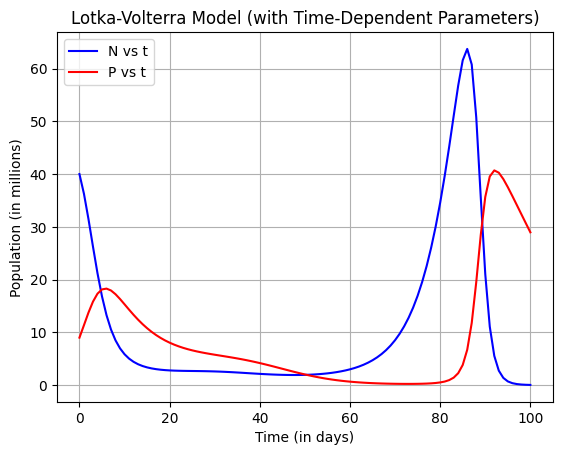

In [39]:
plt.plot(t, N_rk, label='N vs t', color='blue')
plt.plot(t, P_rk, label='P vs t', color='red')
plt.xlabel('Time (in days)')
plt.ylabel('Population (in millions)')
plt.title('Lotka-Volterra Model (with Time-Dependent Parameters)')
plt.legend()
plt.grid()

plt.show()